<a href="https://colab.research.google.com/github/001ckk/Nairobi-Hospital-Hypothyroid-cases-investigation/blob/main/week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAIROBI HOSPITAL HYPOTHYROID CASES**
 

#**Introduction.**

**Specifying the Question.**

A Nairobi Hospital study to determine if a patient's symptoms indicate if the patient has hypothyroid.

**Metric of success.**

1.  Creating Decision trees :
* Random Forests
* Ada boosted trees
* Gradient Boosted trees

2.  SVM :
*  Applying Polynomial, linear and rbf kernel
functions to build an SVM model and then evaluate its performance and pick the kernel that performs the best









**Context.**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Using the healthcare datasets provided to accomplish the following:  

Building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**Data Relevance.**

This is the data set that we are using can be found on this [link](http://bit.ly/hypothyroid_data) . It has the relevant columns for prediction if the symptoms of a 

#**Data loading and cleaning**

In [11]:
# Loading the data and viewing the data.

import pandas as pd
import numpy as np 

hypothyroid = pd.read_csv('hypothyroid.csv')
hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [12]:
# getting a feel of the data.

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

*   There were no missing/null values in the initial
*   There were 26 columns and 3163 rows.
*   All columns had data type - object.

In [13]:
# Dropping columns that were measurement values.
# They were more information to the previous column and thus they were not of major importance to this study.

data = hypothyroid.drop(['TSH','T3','TT4','T4U','FTI','TBG'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

I will now be working with the new data.

In [14]:
data.describe().transpose()

# From this we can see that despite there being no null values, where there should have been null values, they were replaced with '?'
# 446 entries for age and 73 entries for gender
# I will thus remove these values.



,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [15]:
# dropping entries 

# Since sex can only be male or female, I will be dropping where there are no entries.
# I will also drop the age rows that do not have entries.

data.drop(data.index[data['sex'] == '?'], inplace=True)
data.drop(data.index[data['age'] == '?'], inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 0 to 3162
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     2700 non-null   object
 1   age                        2700 non-null   object
 2   sex                        2700 non-null   object
 3   on_thyroxine               2700 non-null   object
 4   query_on_thyroxine         2700 non-null   object
 5   on_antithyroid_medication  2700 non-null   object
 6   thyroid_surgery            2700 non-null   object
 7   query_hypothyroid          2700 non-null   object
 8   query_hyperthyroid         2700 non-null   object
 9   pregnant                   2700 non-null   object
 10  sick                       2700 non-null   object
 11  tumor                      2700 non-null   object
 12  lithium                    2700 non-null   object
 13  goitre                     2700 non-null   object
 14  TSH_meas

#**Exploratory Data Analysis**

**Univariate Analysis**

In [17]:
data.describe().transpose()

,count,unique,top,freq
status,2700,2,negative,2564
age,2700,92,59,64
sex,2700,2,F,1909
on_thyroxine,2700,2,f,2272
query_on_thyroxine,2700,2,f,2654
on_antithyroid_medication,2700,2,f,2664
thyroid_surgery,2700,2,f,2610
query_hypothyroid,2700,2,f,2487
query_hyperthyroid,2700,2,f,2478
pregnant,2700,2,f,2641


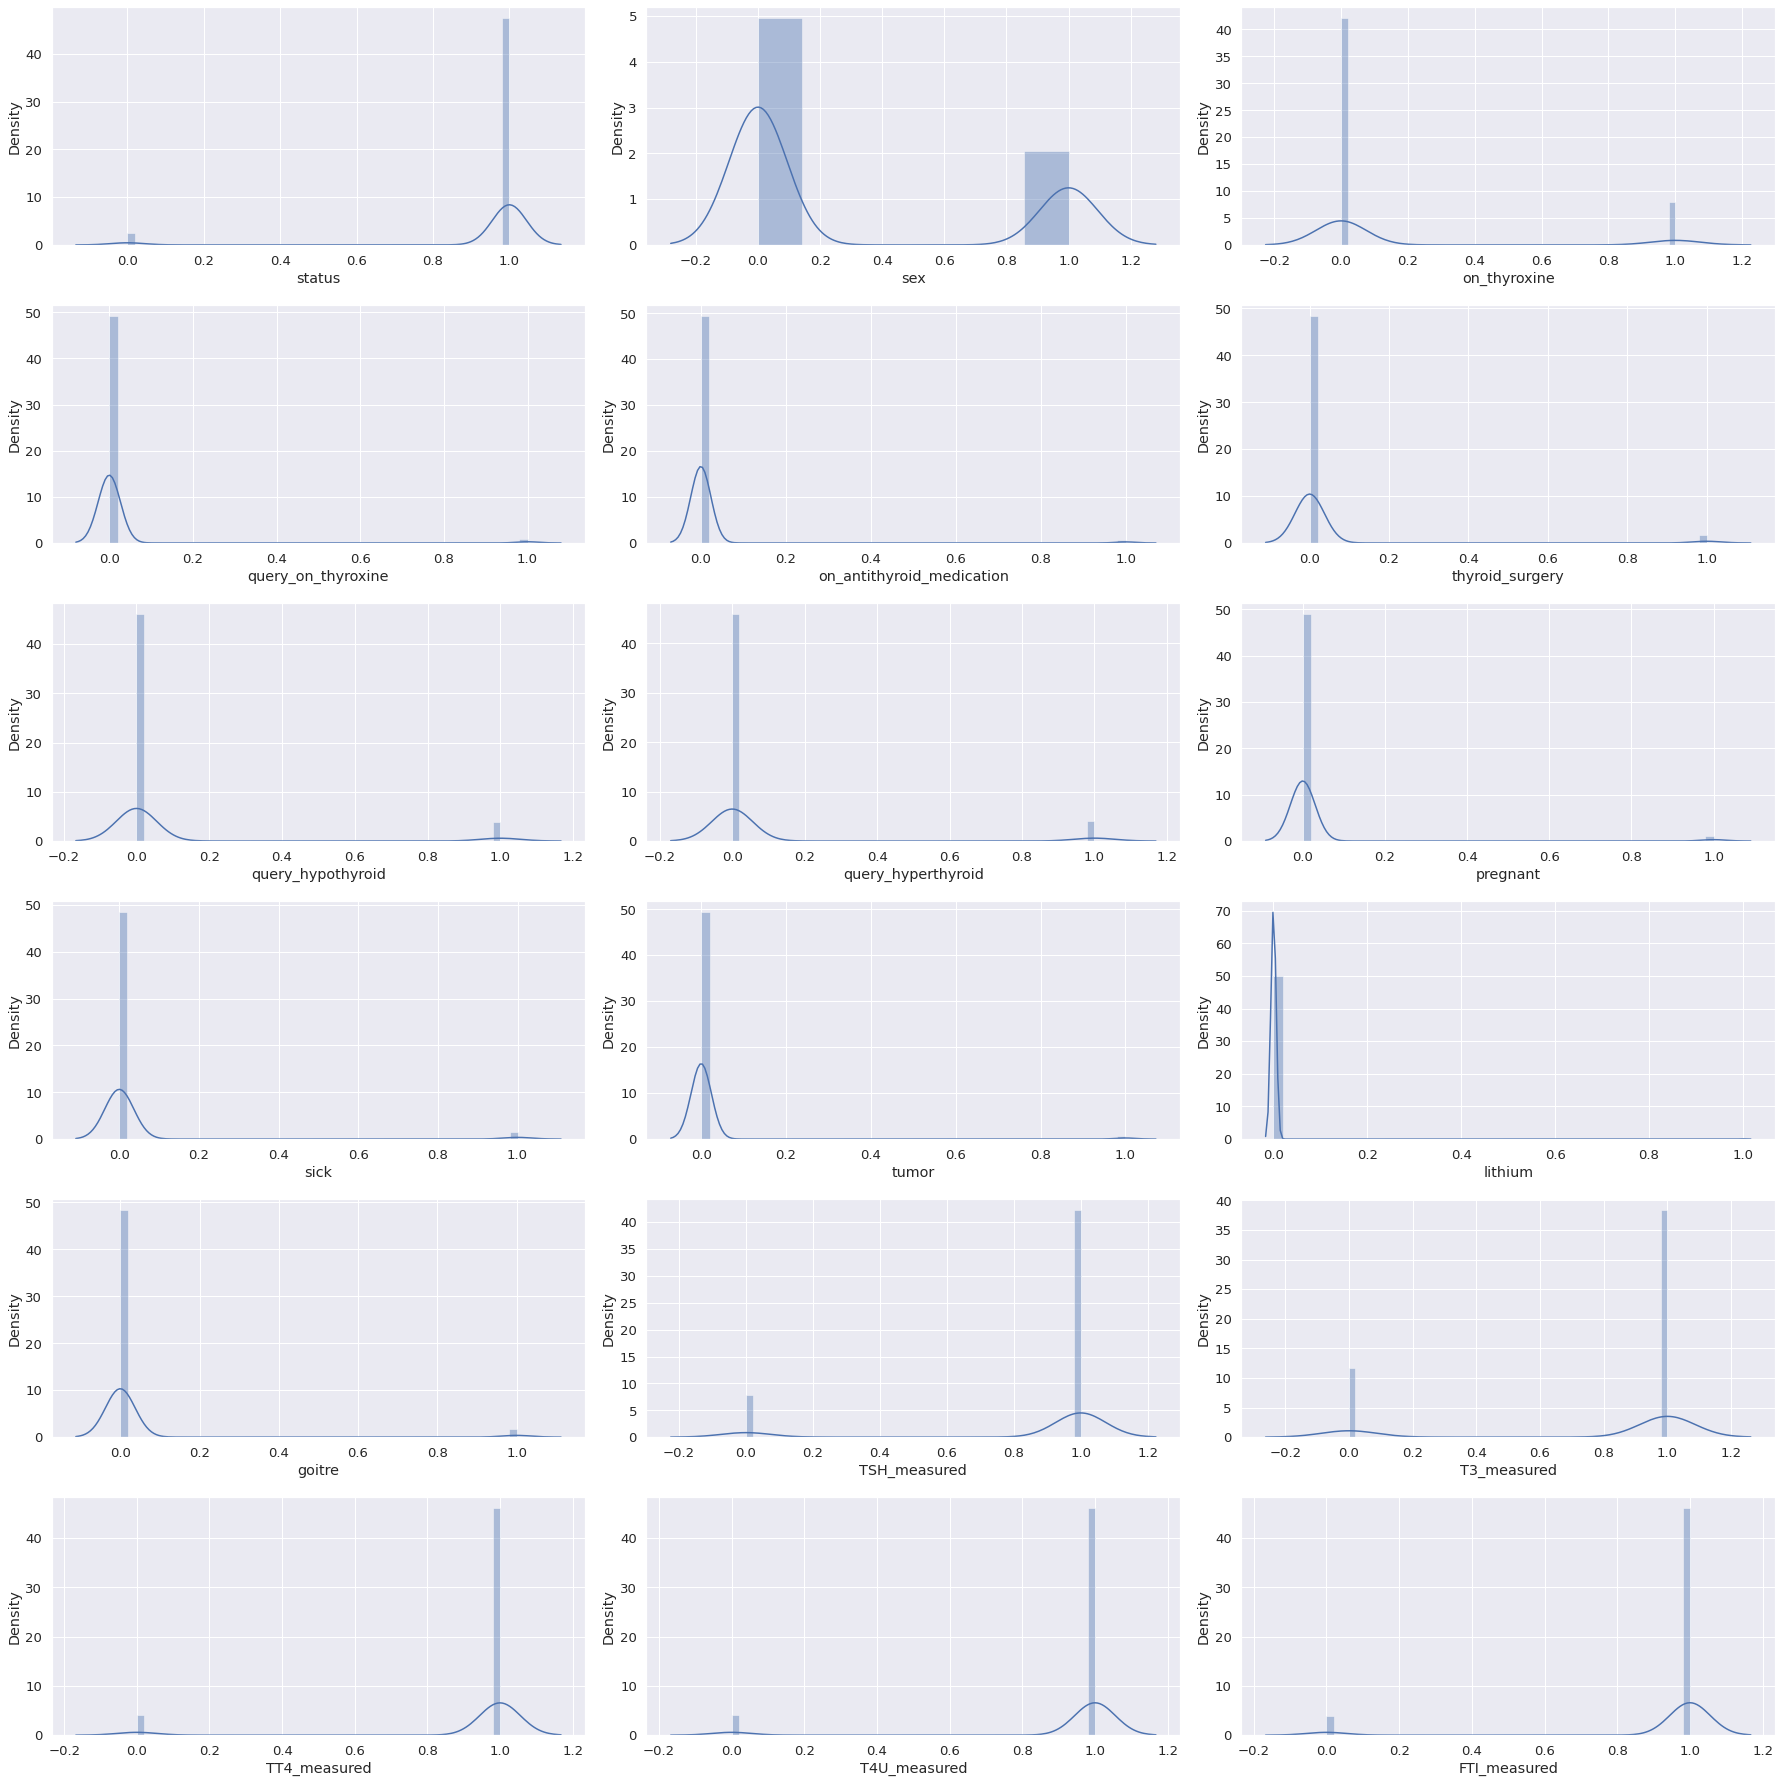

In [40]:
#plotting summaries of the numerical columns from the dataset
import warnings
warnings.filterwarnings("ignore")

var = data1_enc.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))

for col, ax in zip(var, axes.flatten()):


  sns.distplot(data1_enc[col], hist=True, ax=ax)

plt.tight_layout();

# This shows the count for each variable.

**Bivariate Analysis**

In [19]:
# dropping the column age as it is already numerical.
data1 = data.drop('age', axis = 1)

# Encoding to change the values to numerical values.
from sklearn.preprocessing import LabelEncoder
data1_enc = data1.copy()
enc = LabelEncoder()

for col in list(data1_enc.columns):
  data1_enc[col] = enc.fit_transform(data1_enc[col])
data1_enc

# Returning age to the new data

data1_enc['age'] = data['age']
data1_enc.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured,age
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,72
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,15
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,24
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,24
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,77


In [20]:
data1_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 0 to 3162
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     2700 non-null   int64 
 1   sex                        2700 non-null   int64 
 2   on_thyroxine               2700 non-null   int64 
 3   query_on_thyroxine         2700 non-null   int64 
 4   on_antithyroid_medication  2700 non-null   int64 
 5   thyroid_surgery            2700 non-null   int64 
 6   query_hypothyroid          2700 non-null   int64 
 7   query_hyperthyroid         2700 non-null   int64 
 8   pregnant                   2700 non-null   int64 
 9   sick                       2700 non-null   int64 
 10  tumor                      2700 non-null   int64 
 11  lithium                    2700 non-null   int64 
 12  goitre                     2700 non-null   int64 
 13  TSH_measured               2700 non-null   int64 
 14  T3_measu

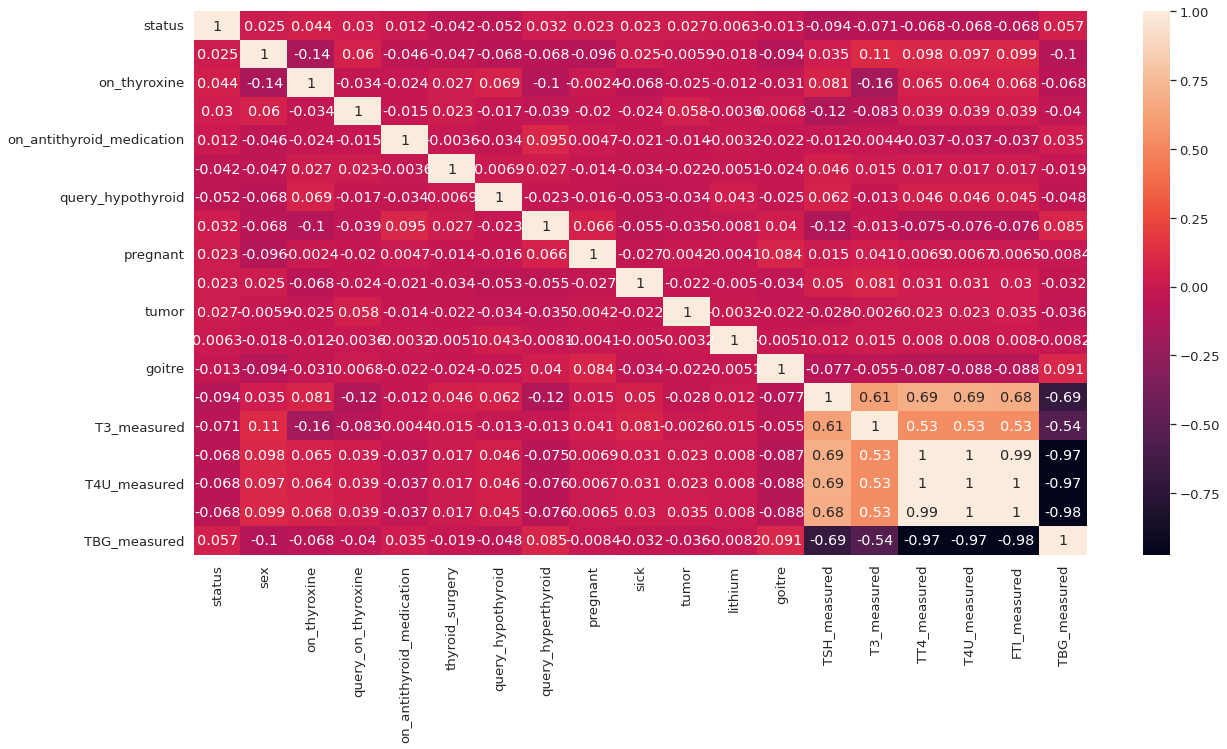

In [21]:
# Doing a heatmap to show correlation.

sns.heatmap(data1_enc.corr(),annot=True)
plt.gcf().set_size_inches(20,10)
plt.show()

From this we can see that the '_measured' columns are highly correlated.
Others are perfectly correlated 

#**Decision Trees**

**Random Forests**

In [22]:
data1_enc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
status,2700.0,0.949630,0.218749,0.0,1.0,1.0,1.0,1.0
sex,2700.0,0.292963,0.455206,0.0,0.0,0.0,1.0,1.0
on_thyroxine,2700.0,0.158519,0.365294,0.0,0.0,0.0,0.0,1.0
query_on_thyroxine,2700.0,0.017037,0.129433,0.0,0.0,0.0,0.0,1.0
on_antithyroid_medication,2700.0,0.013333,0.114719,0.0,0.0,0.0,0.0,1.0
thyroid_surgery,2700.0,0.033333,0.179539,0.0,0.0,0.0,0.0,1.0
query_hypothyroid,2700.0,0.078889,0.269615,0.0,0.0,0.0,0.0,1.0
query_hyperthyroid,2700.0,0.082222,0.274754,0.0,0.0,0.0,0.0,1.0
pregnant,2700.0,0.021852,0.146227,0.0,0.0,0.0,0.0,1.0
sick,2700.0,0.032222,0.176622,0.0,0.0,0.0,0.0,1.0


In [23]:
data1_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 0 to 3162
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     2700 non-null   int64 
 1   sex                        2700 non-null   int64 
 2   on_thyroxine               2700 non-null   int64 
 3   query_on_thyroxine         2700 non-null   int64 
 4   on_antithyroid_medication  2700 non-null   int64 
 5   thyroid_surgery            2700 non-null   int64 
 6   query_hypothyroid          2700 non-null   int64 
 7   query_hyperthyroid         2700 non-null   int64 
 8   pregnant                   2700 non-null   int64 
 9   sick                       2700 non-null   int64 
 10  tumor                      2700 non-null   int64 
 11  lithium                    2700 non-null   int64 
 12  goitre                     2700 non-null   int64 
 13  TSH_measured               2700 non-null   int64 
 14  T3_measu

In [41]:
# Defining the variables
y = data1_enc['status'].values
x = data1_enc.drop(['status'], axis =1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Importing the model 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth = 5)
forest = forest.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(x_test)

In [46]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9493827160493827
[[  0  41]
 [  0 769]]


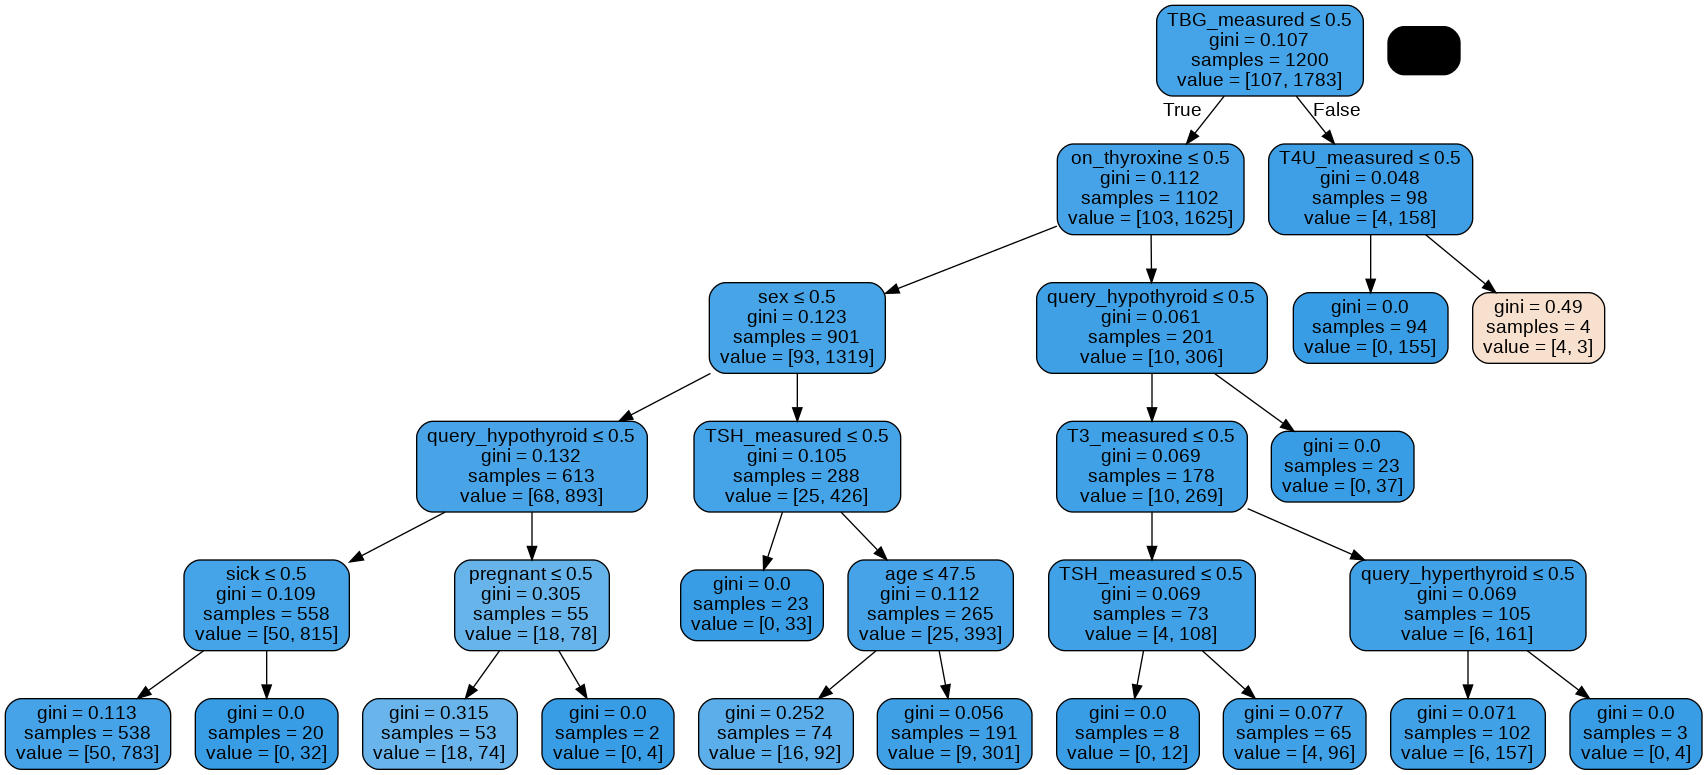

In [26]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

test_features = data1_enc.columns.to_list()
test_features.remove('status')

dot_data = StringIO()
# pick a specific tree from the forest, the 50th tree 
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [27]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


# From this we can see that the most important variables are the first 9 variables in this column.

[('sex', 0.01), ('on_thyroxine', 0.05), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.26), ('query_hyperthyroid', 0.0), ('pregnant', 0.03), ('sick', 0.02), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.02), ('T3_measured', 0.0), ('TT4_measured', 0.0), ('T4U_measured', 0.38), ('FTI_measured', 0.0), ('TBG_measured', 0.03), ('age', 0.2)]

Variable: T4U_measured         Importance: 0.38
Variable: query_hypothyroid    Importance: 0.26
Variable: age                  Importance: 0.2
Variable: on_thyroxine         Importance: 0.05
Variable: pregnant             Importance: 0.03
Variable: TBG_measured         Importance: 0.03
Variable: sick                 Importance: 0.02
Variable: TSH_measured         Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importan

In [28]:
# Removing the not so important variables and repeating the same process 

# Defining the variables
y = data1_enc['status'].values
xx = data1_enc.drop(['status','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hyperthyroid','tumor','lithium','goitre','T3_measured','TT4_measured','FTI_measured'], axis =1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Importing the model 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth = 5)
forest = forest.fit(x_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(x_test)

In [47]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9493827160493827
[[  0  41]
 [  0 769]]


**Gradient Boosted Trees**

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x)

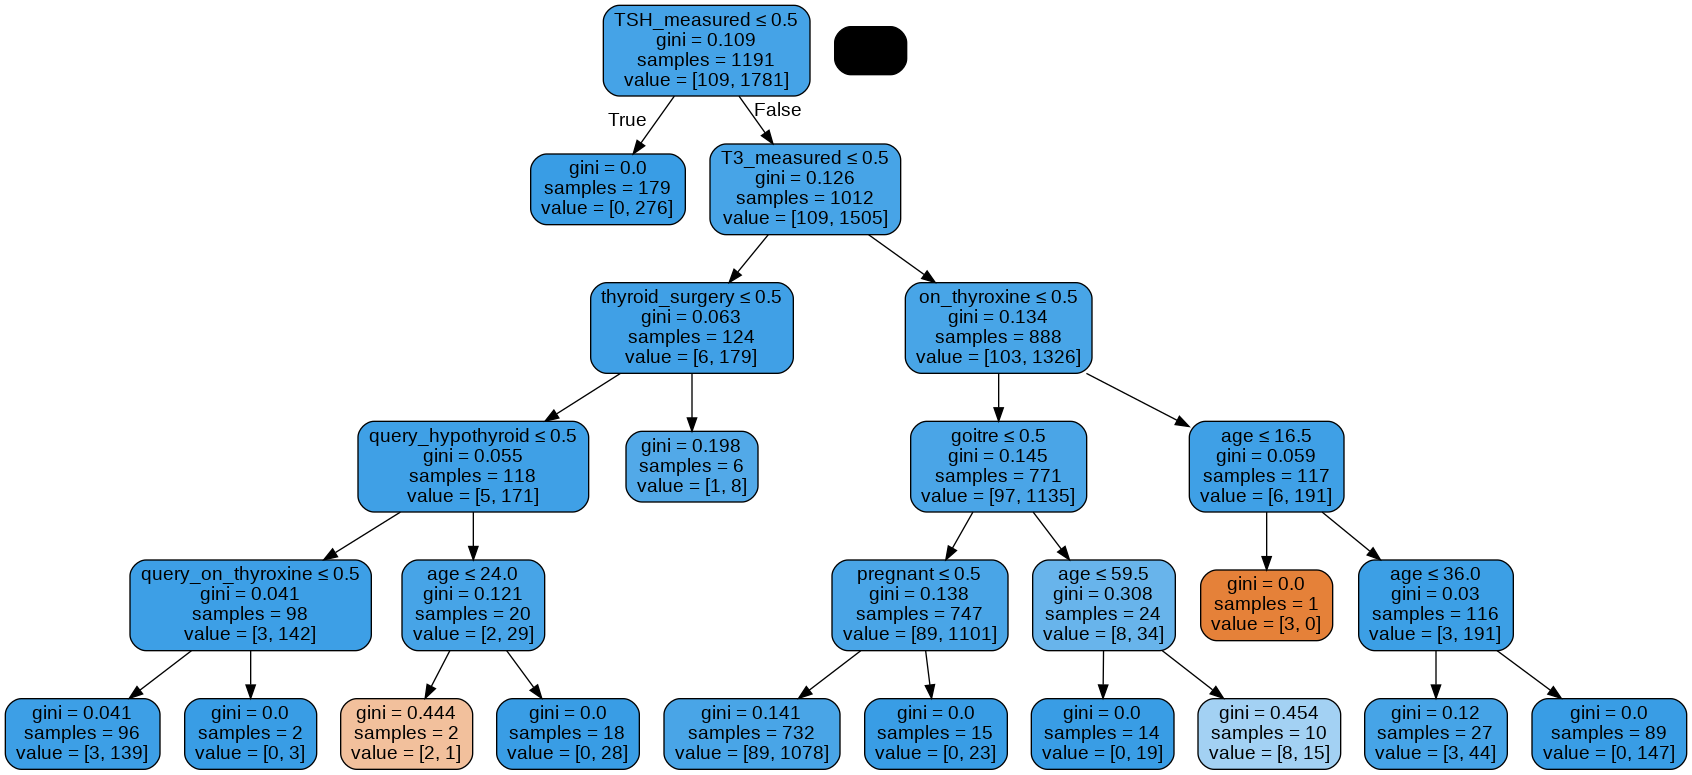

In [31]:
# Getting the 10th tree 

test_features = data1_enc.columns.to_list()
test_features.remove('status')

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[10]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_gbr.png')
Image(graph.create_png())

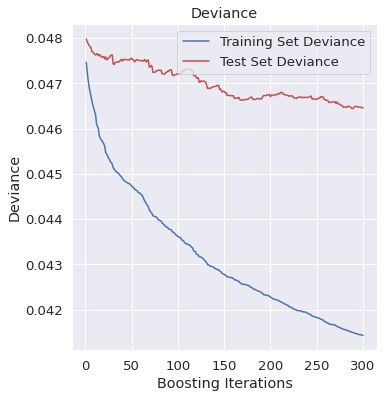

In [50]:


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(x_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

#**SVM**

In [33]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

**Linear Kernel**

In [58]:
y = data1_enc['status']
x = data1_enc.drop(['status'], axis =1)

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(x, y)

In [61]:
# making prediction
y_pred = clf_model.predict(x_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9493827160493827
[[  0  41]
 [  0 769]]


**Polynomial Kernel**

In [60]:
# Building the model

polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(x_train, y_train)

SVC(gamma='auto', kernel='poly')

In [62]:
# making prediction
y_pred = polyclassifier.predict(x_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9481481481481482
[[  0  41]
 [  1 768]]


**RBF (Radial basis function)**

In [65]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', degree = 3, gamma = 0.001)
# Training the model using the training set
rbfclassifier.fit(x_train, y_train)

SVC(gamma=0.001)

In [66]:
# making prediction
y_pred = rbfclassifier.predict(x_test)
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9493827160493827
[[  0  41]
 [  0 769]]


#**Conclusion**

Under SVM, the linear kernel has the best level of accuracy of 94.938 %

Of all the models done the linear kernel performed the best and should be used
